In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cirq
from tqdm import tqdm
from Shadow_Tomography import *
from numpy.linalg import matrix_power
import matplotlib

font = {'family' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)


N =2
nsimu = 10000
n_ave=10
N_U = 1500
qubits = cirq.LineQubit.range(N)
circuit = base(qubits)
p_set= np.arange(0.,0.6,0.01)
distance = []
distance2= []
distance3 = []
distance10 = []
vardistance = []
vardistance2= []
vardistance3 = []
vardistance10 = []
for proba in tqdm(p_set):
    dist=[]
    dist2=[]
    dist3=[]
    dist10=[]
    error= 0.
    for _ in range(n_ave):
        rho_shadow = find_rho(circuit,qubits,N,nsimu,probability=proba)
        rho_shadow2 = matrix_power(rho_shadow,2)
        rho_shadow3 = matrix_power(rho_shadow,3)
        rho_shadow10 = matrix_power(rho_shadow,10)

        rho_shadow  /= np.trace(rho_shadow)
        rho_shadow2 /= np.trace(rho_shadow2)
        rho_shadow3 /= np.trace(rho_shadow3)
        rho_shadow10 /= np.trace(rho_shadow10)

        simulator = cirq.Simulator()
        simulation = simulator.simulate(circuit)
        final_state = np.array([simulation.final_state_vector])
        rho_actual = final_state.T@final_state
               
        dist.append(trace_dist(rho_actual,rho_shadow))
        dist2.append(trace_dist(rho_actual,rho_shadow2))
        dist3.append(trace_dist(rho_actual,rho_shadow3))
        dist10.append(trace_dist(rho_actual,rho_shadow10))

    distance.append(np.mean(dist))
    distance2.append(np.mean(dist2))
    distance3.append(np.mean(dist3))
    distance10.append(np.mean(dist10))
    vardistance.append(np.var(dist))
    vardistance2.append(np.var(dist2))
    vardistance3.append(np.var(dist3))
    vardistance10.append(np.var(dist10))



/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


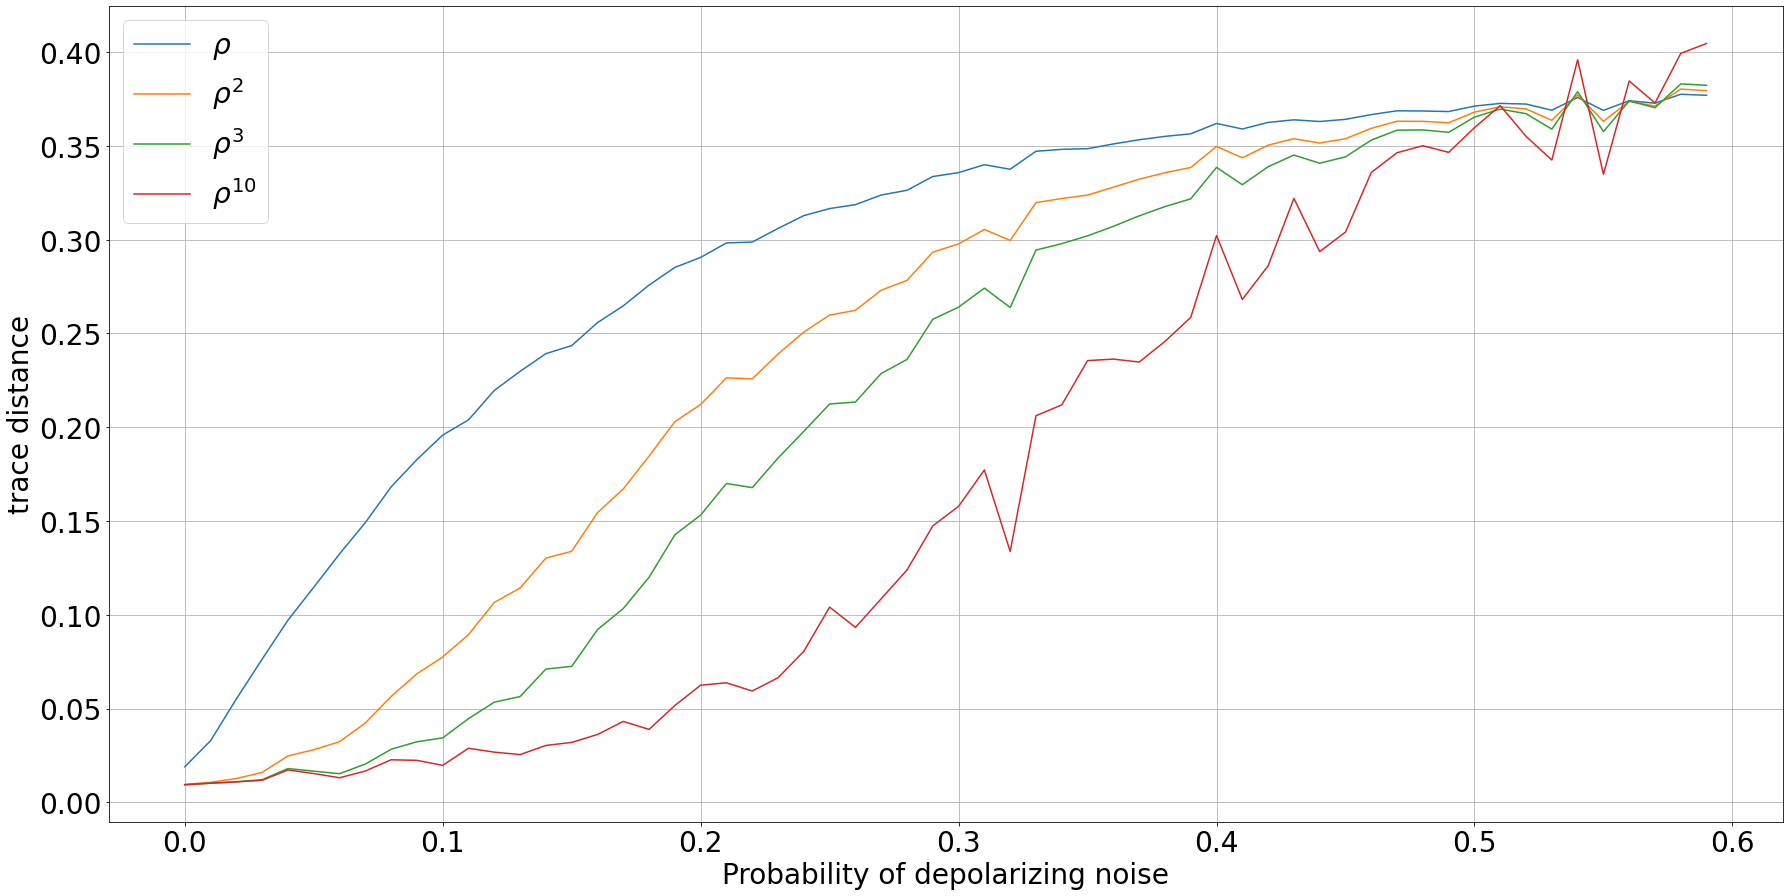

/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


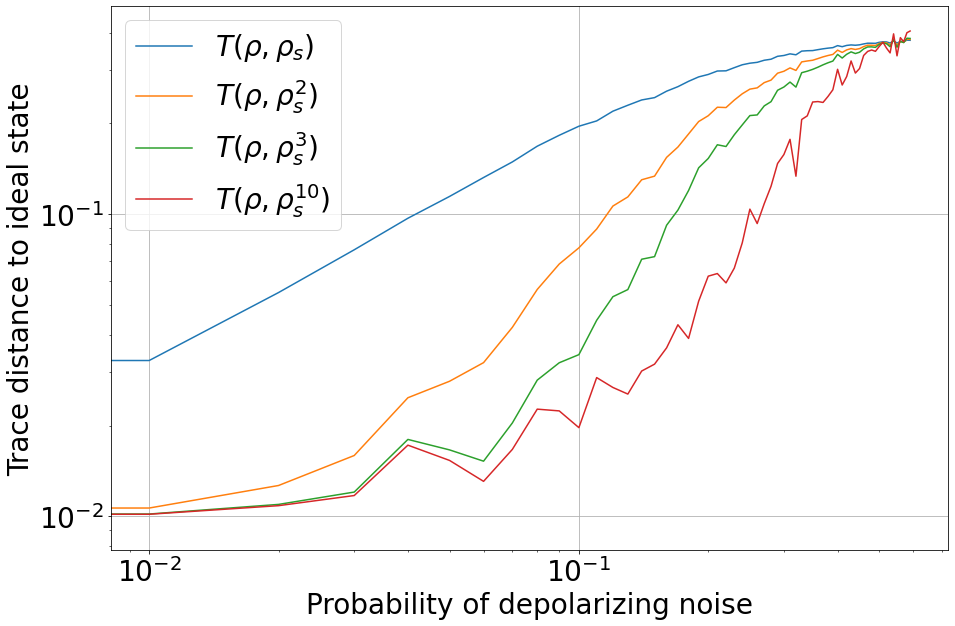

In [7]:
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)
matplotlib.rc('font', **font)

distance = np.array(distance)
distance2 = np.array(distance2)
distance3 = np.array(distance3)
distance10 = np.array(distance10)

vardistance = np.array(vardistance)
vardistance2 = np.array(vardistance2)
vardistance3 = np.array(vardistance3)
vardistance10 = np.array(vardistance10)

plt.figure(figsize = (30,15))
plt.plot(p_set,distance,label= r'$\rho$')
plt.plot(p_set,distance2,label= r'$\rho^2$')
plt.plot(p_set,distance3,label= r'$\rho^3$')
plt.plot(p_set,distance10,label= r'$\rho^{10}$')
plt.grid()
plt.legend()
plt.xlabel("Probability of depolarizing noise")
plt.ylabel("trace distance")
plt.show()


plt.figure(figsize = (15,10))
plt.loglog(p_set,distance,label= r'$T(\rho,\rho_s)$')
plt.loglog(p_set,distance2,label= r'$T(\rho,\rho^2_s)$')
plt.loglog(p_set,distance3,label= r'$T(\rho,\rho^3_s)$')
plt.loglog(p_set,distance10,label= r'$T(\rho,\rho^{10}_s)$')
plt.grid()
plt.legend()
plt.xlabel("Probability of depolarizing noise")
plt.ylabel("Trace distance to ideal state")
plt.show()
